In [1184]:
# 모듈 설치
import pandas as pd
import os 
import csv
import datetime  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="../Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# [ 쇼핑인사이트 카테고리 분석을 위한 1차 데이터 분석 ] 

- 종류 :  (1) 여가/편의시설, (2) 도서
 
- 분류 : 성별(남,여) , 연령대별 (10대, 20대, 30대, 40대, 50대, 60대 이상)

- 기간 : 2021.07.09 ~ 2022.07.09

In [1185]:
# 쇼핑 인사이트 카테고리 클릭량 데이터 폴더 주소 (from 네이버 쇼핑인사이트)
forders= os.listdir('./week3/data1/')

# 쇼핑 인사이트 클릭량 데이터 파일 주소
PATH_click ="./week3/data1/"

# 판매유형별 판매금액 데이터 주소 (from 출판유통통합전상망) 
PATH_sell = "../TEAM_PROJECT/경제_재무_비즈니스_경영.csv"

# 파일 하나 불러온 예시
example = pd.read_csv(PATH_click + "경제_경영_남성_10대.csv" ,header=7)
example

,날짜,경제/경영
0,2021-07-09,31
1,2021-07-10,24
2,2021-07-11,24
3,2021-07-12,63
4,2021-07-13,49
...,...,...
361,2022-07-05,25
362,2022-07-06,23
363,2022-07-07,34
364,2022-07-08,25


In [1186]:
# 데이터 합치기

filebox=[]          # 파일 하나씩 추가하기 위한 리스트
names=[]            # 파일 이름을 각 컬럼명으로 사용하기 위한 리스트

for files in forders:
    df= pd.read_csv(PATH_click + files, header=7) 
    filebox.append(df.iloc[:,1:])       # 날짜를 제외한 클릭량 데이터만 받기 
    df= pd.concat(filebox,axis=1)       # 리스트에 넣어둔 클릭량 데이터 합치기
    names.append(files.split(".")[0])   # 파일 이름 모으기 ('.csv' 제거)
df

,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,경제/경영,...,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의,여가/생활편의
0,31,8,15,22,12,7,29,6,21,19,...,52,41,36,30,30,53,46,37,32,33
1,24,7,23,23,24,14,27,3,17,16,...,53,43,38,32,36,54,48,40,35,34
2,24,12,24,27,25,19,47,5,17,18,...,58,46,40,34,37,60,51,42,35,33
3,63,14,31,26,32,13,59,6,19,24,...,60,48,42,34,33,60,54,43,33,33
4,49,15,26,31,23,14,45,6,22,25,...,59,47,43,35,32,60,53,43,35,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,25,9,20,20,26,20,22,5,22,14,...,93,83,82,76,52,96,88,81,74,77
362,23,10,18,20,23,13,27,4,19,12,...,90,80,81,78,49,91,86,78,72,75
363,34,7,17,23,16,14,45,5,14,13,...,85,76,78,73,49,85,81,75,71,71
364,25,5,7,12,13,6,41,2,6,8,...,80,75,73,69,51,80,76,73,68,70


In [1187]:
# 컬럼을 파일이름으로 설정하기 

df.columns = names
df

,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,...,여가_생활편의_남자_30,여가_생활편의_남자_40,여가_생활편의_남자_50,여가_생활편의_남자_60,여가_생활편의_여자_10,여가_생활편의_여자_20,여가_생활편의_여자_30,여가_생활편의_여자_40,여가_생활편의_여자_50,여가_생활편의_여자_60
0,31,8,15,22,12,7,29,6,21,19,...,52,41,36,30,30,53,46,37,32,33
1,24,7,23,23,24,14,27,3,17,16,...,53,43,38,32,36,54,48,40,35,34
2,24,12,24,27,25,19,47,5,17,18,...,58,46,40,34,37,60,51,42,35,33
3,63,14,31,26,32,13,59,6,19,24,...,60,48,42,34,33,60,54,43,33,33
4,49,15,26,31,23,14,45,6,22,25,...,59,47,43,35,32,60,53,43,35,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,25,9,20,20,26,20,22,5,22,14,...,93,83,82,76,52,96,88,81,74,77
362,23,10,18,20,23,13,27,4,19,12,...,90,80,81,78,49,91,86,78,72,75
363,34,7,17,23,16,14,45,5,14,13,...,85,76,78,73,49,85,81,75,71,71
364,25,5,7,12,13,6,41,2,6,8,...,80,75,73,69,51,80,76,73,68,70


In [1188]:
# 날짜를 datetime 컬럼 추가 -> 인덱스 설정

df['날짜']=pd.date_range('2021-07-09','2022-07-09', freq='D')
df=df.set_index('날짜')
df

,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,...,여가_생활편의_남자_30,여가_생활편의_남자_40,여가_생활편의_남자_50,여가_생활편의_남자_60,여가_생활편의_여자_10,여가_생활편의_여자_20,여가_생활편의_여자_30,여가_생활편의_여자_40,여가_생활편의_여자_50,여가_생활편의_여자_60
날짜,,,,,,,,,,,,,,,,,,,,,
2021-07-09,31,8,15,22,12,7,29,6,21,19,...,52,41,36,30,30,53,46,37,32,33
2021-07-10,24,7,23,23,24,14,27,3,17,16,...,53,43,38,32,36,54,48,40,35,34
2021-07-11,24,12,24,27,25,19,47,5,17,18,...,58,46,40,34,37,60,51,42,35,33
2021-07-12,63,14,31,26,32,13,59,6,19,24,...,60,48,42,34,33,60,54,43,33,33
2021-07-13,49,15,26,31,23,14,45,6,22,25,...,59,47,43,35,32,60,53,43,35,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,25,9,20,20,26,20,22,5,22,14,...,93,83,82,76,52,96,88,81,74,77
2022-07-06,23,10,18,20,23,13,27,4,19,12,...,90,80,81,78,49,91,86,78,72,75
2022-07-07,34,7,17,23,16,14,45,5,14,13,...,85,76,78,73,49,85,81,75,71,71


# [ 현재 프레임 컬럼 ]

## ●  0 ~ 11 -> 경제/경영 데이터 (2차 세부 카테고리 분석용)

## ● 12 ~ 23 -> 도서 데이터         (1차 카테고리 분석용)

## ● 24 ~ 35 -> 여가/편의 데이터  (1차 카테고리 분석용)


# 여가/ 생활편의 데이터 불러오기

In [1189]:
df1=df.iloc[:,24:]
df1

# 팀원간 데이터 통합 분석을 위한 파일 저장.
# df1.to_csv('여가_생활편의.csv')

,여가_생활편의_남자_10,여가_생활편의_남자_20,여가_생활편의_남자_30,여가_생활편의_남자_40,여가_생활편의_남자_50,여가_생활편의_남자_60,여가_생활편의_여자_10,여가_생활편의_여자_20,여가_생활편의_여자_30,여가_생활편의_여자_40,여가_생활편의_여자_50,여가_생활편의_여자_60
날짜,,,,,,,,,,,,
2021-07-09,45,55,52,41,36,30,30,53,46,37,32,33
2021-07-10,48,60,53,43,38,32,36,54,48,40,35,34
2021-07-11,47,61,58,46,40,34,37,60,51,42,35,33
2021-07-12,38,58,60,48,42,34,33,60,54,43,33,33
2021-07-13,39,58,59,47,43,35,32,60,53,43,35,34
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,50,88,93,83,82,76,52,96,88,81,74,77
2022-07-06,50,88,90,80,81,78,49,91,86,78,72,75
2022-07-07,55,81,85,76,78,73,49,85,81,75,71,71


# 도서 데이터 불러오기

In [1190]:
df2=df.iloc[:,12:24]
df2

# 팀원간 데이터 통합 분석을 위한 파일 저장.
# df2.to_csv('도서.csv')

,도서_남자_10,도서_남자_20,도서_남자_30,도서_남자_40,도서_남자_50,도서_남자_60,도서_여자_10,도서_여자_20,도서_여자_30,도서_여자_40,도서_여자_50,도서_여자_60
날짜,,,,,,,,,,,,
2021-07-09,23,20,33,32,25,25,27,27,42,29,26,28
2021-07-10,23,19,33,34,27,24,28,24,38,28,25,28
2021-07-11,26,22,39,40,30,31,33,27,42,31,25,30
2021-07-12,31,29,45,42,31,32,36,35,51,36,30,32
2021-07-13,28,28,43,38,30,33,32,34,52,37,30,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,36,32,50,48,45,45,37,35,46,46,47,45
2022-07-06,41,30,45,50,46,42,39,32,45,45,48,46
2022-07-07,42,28,41,46,46,40,38,30,43,42,45,45


# [ 2차 세부 분류 : 도서  ] 

## ● 종류: 경제 / 경영 클릭 수 기반 데이터

## ● 분류 : 성별, 연령대별 , 월별


In [1191]:
# 파일 불러오기
df3=df.iloc[:,:12]
df3

# df3.to_csv('경제_경영.csv')

,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,경제_경영_여성_50대,경제_경영_여성_60대이상
날짜,,,,,,,,,,,,
2021-07-09,31,8,15,22,12,7,29,6,21,19,9,4
2021-07-10,24,7,23,23,24,14,27,3,17,16,8,4
2021-07-11,24,12,24,27,25,19,47,5,17,18,8,12
2021-07-12,63,14,31,26,32,13,59,6,19,24,12,8
2021-07-13,49,15,26,31,23,14,45,6,22,25,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,25,9,20,20,26,20,22,5,22,14,14,4
2022-07-06,23,10,18,20,23,13,27,4,19,12,16,10
2022-07-07,34,7,17,23,16,14,45,5,14,13,7,5


# 1. 연령대별 클릭량 분석 

In [1192]:
# 현재 일 단위 인덱스를 월 단위로 변환

col_month = df3.index.to_period('m')
df3_month = df3.set_index(col_month)
df3_month 

,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,경제_경영_여성_50대,경제_경영_여성_60대이상
날짜,,,,,,,,,,,,
2021-07,31,8,15,22,12,7,29,6,21,19,9,4
2021-07,24,7,23,23,24,14,27,3,17,16,8,4
2021-07,24,12,24,27,25,19,47,5,17,18,8,12
2021-07,63,14,31,26,32,13,59,6,19,24,12,8
2021-07,49,15,26,31,23,14,45,6,22,25,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07,25,9,20,20,26,20,22,5,22,14,14,4
2022-07,23,10,18,20,23,13,27,4,19,12,16,10
2022-07,34,7,17,23,16,14,45,5,14,13,7,5


In [1193]:
# 인덱스 통합을 위한 재설정
df3_month.columns=["10대","20대","30대","40대","50대","60대","10대","20대","30대","40대","50대","60대"]

# 남녀별로 데이터 분리 및 총합 계산 -> 데이터프레임으로 변환
df3_male_age=df3_month.iloc[:,:6].sum().to_frame()
df3_female_age=df3_month.iloc[:,6:].sum().to_frame()
df3_male_age

,0
10대,10590
20대,8564
30대,14330
40대,15637
50대,16079
60대,13733


In [1194]:
# 가공한 데이터 통합
df3_age=pd.concat([df3_male_age,df3_female_age],axis=1,)

# 컬럼 재설정
df3_age.columns=['남성','여성']

In [1195]:
df3_age

,남성,여성
10대,10590,12503
20대,8564,4732
30대,14330,11859
40대,15637,11530
50대,16079,7621
60대,13733,5208


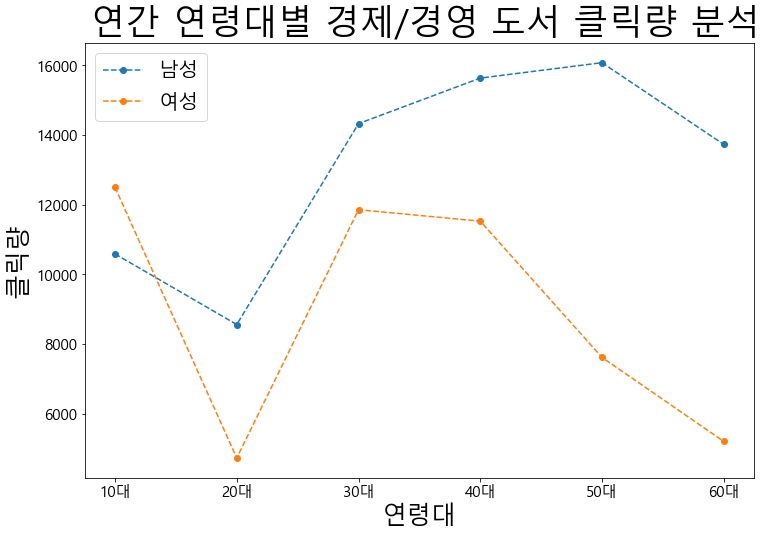

In [1196]:
# [ 연간 연령대별 경제/경영 도서 클릭량 분석 그래프]

# 그래프 사이즈
plt.figure(figsize=(12, 8))

# 그래프 그리기, 라인형태 설정, 라벨 설정
plt.plot(df3_age,label=df3_age.columns,linestyle = '--',marker = 'o')

# 그래프 제목
plt.title(" 연간 연령대별 경제/경영 도서 클릭량 분석",fontsize=35)

# 라벨링
plt.xlabel("연령대",fontsize=25)
plt.ylabel('클릭량',fontsize=25)

# 범례 글자 크기 설정
plt.legend(fontsize=20)

# x축 글자 크기 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# 연령대별 분류 결과

- 경제/경영 도서 관심도는 취업시기인 20대에 가장 낮고, 수입이 원활한 30,40대에 가장 높아지다 50대이상부터 급격한 감소를 보입니다.
- 남녀별 관심도가 크게 차이나는 고령층에 비해 10대 ~ 30 대는 남녀의 관심도가 상대적으로 큰 차이를 보이지 않는 특징이 있습니다.

# 2. 월 단위 클릭량 비교 

In [1197]:
# 성별간 데이터 나누기
male_click = df3.iloc[:,:6]
female_click = df3.iloc[:,6:12]

# 연령별 일간 클릭량 합 컬럼 생성

# 남성
df3['male_click'] = male_click.sum(axis=1)

# 여성
df3['female_click'] = female_click.sum(axis=1) 
df3

C:\Users\alstn\AppData\Local\Temp\ipykernel_16868\270170595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['male_click'] = male_click.sum(axis=1)
C:\Users\alstn\AppData\Local\Temp\ipykernel_16868\270170595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['female_click'] = female_click.sum(axis=1)


,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,경제_경영_여성_50대,경제_경영_여성_60대이상,male_click,female_click
날짜,,,,,,,,,,,,,,
2021-07-09,31,8,15,22,12,7,29,6,21,19,9,4,95,88
2021-07-10,24,7,23,23,24,14,27,3,17,16,8,4,115,75
2021-07-11,24,12,24,27,25,19,47,5,17,18,8,12,131,107
2021-07-12,63,14,31,26,32,13,59,6,19,24,12,8,179,128
2021-07-13,49,15,26,31,23,14,45,6,22,25,16,10,158,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,25,9,20,20,26,20,22,5,22,14,14,4,120,81
2022-07-06,23,10,18,20,23,13,27,4,19,12,16,10,107,88
2022-07-07,34,7,17,23,16,14,45,5,14,13,7,5,111,89


In [1198]:
# 현재 일 단위 인덱스를 월 단위로 변환

col_month = df3.index.to_period('m')
df3_month = df3.set_index(col_month)
df3_month 

,경제_경영_남성_10대,경제_경영_남성_20대,경제_경영_남성_30대,경제_경영_남성_40대,경제_경영_남성_50대,경제_경영_남성_60대이상,경제_경영_여성_10대,경제_경영_여성_20대,경제_경영_여성_30대,경제_경영_여성_40대,경제_경영_여성_50대,경제_경영_여성_60대이상,male_click,female_click
날짜,,,,,,,,,,,,,,
2021-07,31,8,15,22,12,7,29,6,21,19,9,4,95,88
2021-07,24,7,23,23,24,14,27,3,17,16,8,4,115,75
2021-07,24,12,24,27,25,19,47,5,17,18,8,12,131,107
2021-07,63,14,31,26,32,13,59,6,19,24,12,8,179,128
2021-07,49,15,26,31,23,14,45,6,22,25,16,10,158,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07,25,9,20,20,26,20,22,5,22,14,14,4,120,81
2022-07,23,10,18,20,23,13,27,4,19,12,16,10,107,88
2022-07,34,7,17,23,16,14,45,5,14,13,7,5,111,89


In [1199]:
# [ 그룹화 ]
# 기준 인덱스 : 월 단위 Datetime 
# 데이터 : 월별 클릭량 총합

df3_month=df3_month.groupby(['날짜'])['male_click','female_click'].sum()
df3_month

C:\Users\alstn\AppData\Local\Temp\ipykernel_16868\3929445380.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_month=df3_month.groupby(['날짜'])['male_click','female_click'].sum()


,male_click,female_click
날짜,,
2021-07,3221,2373
2021-08,5000,3813
2021-09,6094,4336
2021-10,6186,4374
2021-11,7444,4872
2021-12,10666,6092
2022-01,8631,5532
2022-02,7662,5239
2022-03,8107,6168


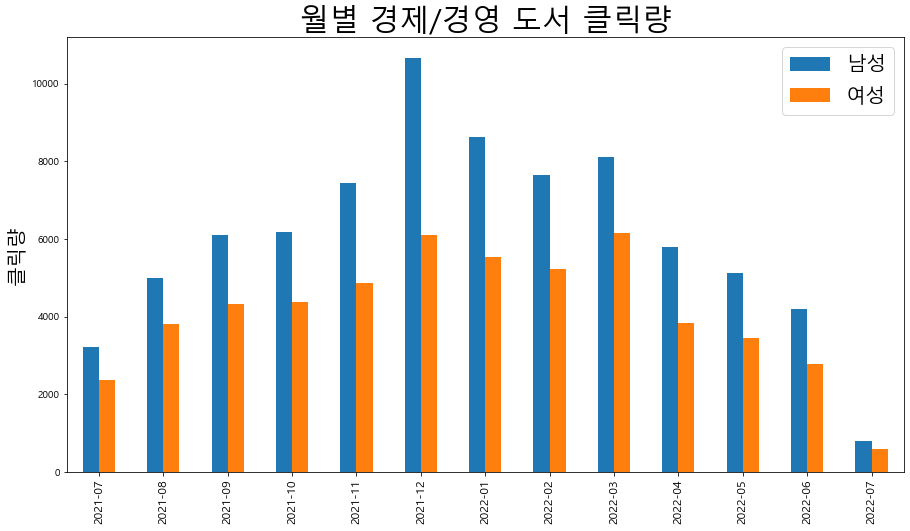

In [1200]:
# 월별 클릭량 총합 비교 막대 그래프 생성

# 그래프 종류 , 크기
df3_month.plot(kind='bar',figsize=(15,8))

# 제목, 글자크기
plt.title('월별 경제/경영 도서 클릭량',fontsize=30)

# 라벨링
plt.xlabel('')
plt.ylabel('클릭량',fontsize=20)

# x축 글자 크기 
plt.xticks(fontsize = 12)

# 범례 설정
plt.legend(['남성','여성'],fontsize=20)

# 월 단위 클릭량 분석 결과
- 경제/경영 도서는 매달 남성이 여성보다 높은 관심도를 보이고 있습니다.
- 연말, 연초에 경제/경영 도서가 전체적으로 높은 관심도를 보이고 있습니다.

# 3. 판매유형별 통계 분석   

- 데이터 종류 : 경제/재무 도서 판매채널별 부수 및 판매금액
- 판매 채널 : (1) 오프라인(매장), (2) 온라인, (3) 지역서점
- 기간 : 2021.07 ~ 2022.06
- 출처 : 출판유통통합전산망

In [1201]:
# 파일 불러오기
df_sell = pd.read_csv(PATH1)
df_sell

,조회기간,오프라인(매장),Unnamed: 2,온라인,Unnamed: 4,지역서점,Unnamed: 6
0,NaN,부수,금액,부수,금액,부수,금액
1,21년 07월,"33,032","535,978,072","30,381","545,445,610",1,"17,800"
2,21년 08월,"81,133","1,339,063,796","62,180","1,091,322,850",821,"13,927,030"
3,21년 09월,"360,561","6,345,916,614","242,464","4,277,040,190","2,799","47,774,805"
4,21년 10월,"332,749","5,523,614,478","213,202","3,413,293,050","2,847","48,666,874"
5,21년 11월,"405,963","6,588,030,366","243,988","3,969,021,991","8,564","138,635,075"
6,21년 12월,"437,551","7,145,387,792","297,432","4,498,437,950","9,967","158,293,670"
7,22년 01월,"316,784","5,310,929,181","224,103","3,714,721,246","5,529","88,453,680"
8,22년 02월,"329,867","5,552,704,977","192,425","3,208,204,973","3,148","51,290,450"
9,22년 03월,"378,859","7,135,674,322","224,110","4,261,272,392","2,527","42,066,676"


In [1202]:
# 컬럼 변경
df_sell.columns=['연월','오프라인(매장)_부수','오프라인(매장)_금액','온라인_부수','온라인_금액','지역서점_부수','지역서점_금액']

# 첫째 행 제거
df_sell.drop(0,inplace=True,axis=0)

# 인덱스 설정 : 연월 데이터
df_sell.set_index('연월',inplace=True)
df_sell

,오프라인(매장)_부수,오프라인(매장)_금액,온라인_부수,온라인_금액,지역서점_부수,지역서점_금액
연월,,,,,,
21년 07월,"33,032","535,978,072","30,381","545,445,610",1,"17,800"
21년 08월,"81,133","1,339,063,796","62,180","1,091,322,850",821,"13,927,030"
21년 09월,"360,561","6,345,916,614","242,464","4,277,040,190","2,799","47,774,805"
21년 10월,"332,749","5,523,614,478","213,202","3,413,293,050","2,847","48,666,874"
21년 11월,"405,963","6,588,030,366","243,988","3,969,021,991","8,564","138,635,075"
21년 12월,"437,551","7,145,387,792","297,432","4,498,437,950","9,967","158,293,670"
22년 01월,"316,784","5,310,929,181","224,103","3,714,721,246","5,529","88,453,680"
22년 02월,"329,867","5,552,704,977","192,425","3,208,204,973","3,148","51,290,450"
22년 03월,"378,859","7,135,674,322","224,110","4,261,272,392","2,527","42,066,676"


In [1203]:
# 판매 금액 데이터만 따로 추출
df_sell_money = df_sell.iloc[:,1::2]
df_sell_money

,오프라인(매장)_금액,온라인_금액,지역서점_금액
연월,,,
21년 07월,"535,978,072","545,445,610","17,800"
21년 08월,"1,339,063,796","1,091,322,850","13,927,030"
21년 09월,"6,345,916,614","4,277,040,190","47,774,805"
21년 10월,"5,523,614,478","3,413,293,050","48,666,874"
21년 11월,"6,588,030,366","3,969,021,991","138,635,075"
21년 12월,"7,145,387,792","4,498,437,950","158,293,670"
22년 01월,"5,310,929,181","3,714,721,246","88,453,680"
22년 02월,"5,552,704,977","3,208,204,973","51,290,450"
22년 03월,"7,135,674,322","4,261,272,392","42,066,676"


In [1204]:
# 판매 금액 데이터 확인 : object
df_sell_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 21년 07월 to 22년 06월
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   오프라인(매장)_금액  12 non-null     object
 1   온라인_금액       12 non-null     object
 2   지역서점_금액      12 non-null     object
dtypes: object(3)
memory usage: 384.0+ bytes


In [1205]:
# 판매 금액 데이터 변환 : object -> float 

# "," ( 콤마 ) -> "" ( 공백 )
df_sell_money['오프라인(매장)_금액']= df_sell_money['오프라인(매장)_금액'].str.replace(",","")
df_sell_money['온라인_금액']= df_sell_money['온라인_금액'].str.replace(",","")
df_sell_money['지역서점_금액']= df_sell_money['지역서점_금액'].str.replace(",","")
df_sell_money

,오프라인(매장)_금액,온라인_금액,지역서점_금액
연월,,,
21년 07월,535978072,545445610,17800
21년 08월,1339063796,1091322850,13927030
21년 09월,6345916614,4277040190,47774805
21년 10월,5523614478,3413293050,48666874
21년 11월,6588030366,3969021991,138635075
21년 12월,7145387792,4498437950,158293670
22년 01월,5310929181,3714721246,88453680
22년 02월,5552704977,3208204973,51290450
22년 03월,7135674322,4261272392,42066676


In [1206]:
# float 타입으로 변환 
df_sell_money['오프라인(매장)_금액']= df_sell_money['오프라인(매장)_금액'].astype(float)
df_sell_money['온라인_금액']= df_sell_money['온라인_금액'].astype(float)
df_sell_money['지역서점_금액']= df_sell_money['지역서점_금액'].astype(float)

In [1207]:
df_sell_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 21년 07월 to 22년 06월
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   오프라인(매장)_금액  12 non-null     float64
 1   온라인_금액       12 non-null     float64
 2   지역서점_금액      12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes


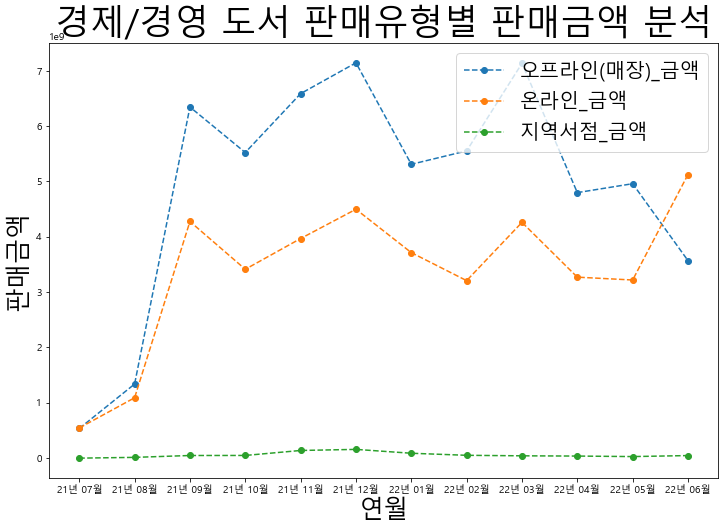

In [1208]:
# [ 월별 판매유형별 판매금액 그래프 ]

# 그래프 사이즈
plt.figure(figsize=(12, 8))

# 그래프 그리기, 라인형태 설정, 라벨 설정
plt.plot(df_sell_money,label=df_sell_money.columns,linestyle = '--',marker = 'o')

# 그래프 제목
plt.title("경제/경영 도서 판매유형별 판매금액 분석",fontsize=35)

# 라벨링
plt.xlabel("연월",fontsize=25)
plt.ylabel('판매금액',fontsize=25)

# 범례 글자 크기 설정
plt.legend(fontsize=20)

plt.show()

# 판매유형별 통계 분석 결과  

- 최근 1년간 9월, 12월, 3월에 높은 판매금액을 기록하고 있고, 실제 코스피 지수의 갑작스런 폭락과 유사함을 확인할 수 있습니다.
- 오프라인 판매는 점차 감소하고 있고, 온라인 판매는 증가하고 있는 모습을 확인할 수 있습니다.

# 4. 경제/경영 도서 판매유형별 판매금액 비율 분석

In [1209]:
# [경제/경영 도서 판매유형별 판매금액 비율 설정]

# 판매 금액 총합 컬럼 생성
df_sell_money['total_sell'] = df_sell_money['오프라인(매장)_금액'] + df_sell_money['온라인_금액'] +df_sell_money['지역서점_금액']

# 오프라인매장이 차지하는 비율 (%)
df_sell_money['오프라인(매장)_금액_percent'] = round(df_sell_money['오프라인(매장)_금액'] / df_sell_money['total_sell'] * 100, 1)

# 온라인매장이 차지하는 비율 (%)
df_sell_money['온라인_금액_percent'] = round(df_sell_money['온라인_금액'] / df_sell_money['total_sell'] * 100, 1)

# 지역서점이 차지하는 비율 (%)
df_sell_money['지역서점_금액_percent'] = round(df_sell_money['지역서점_금액'] / df_sell_money['total_sell'] * 100, 1)

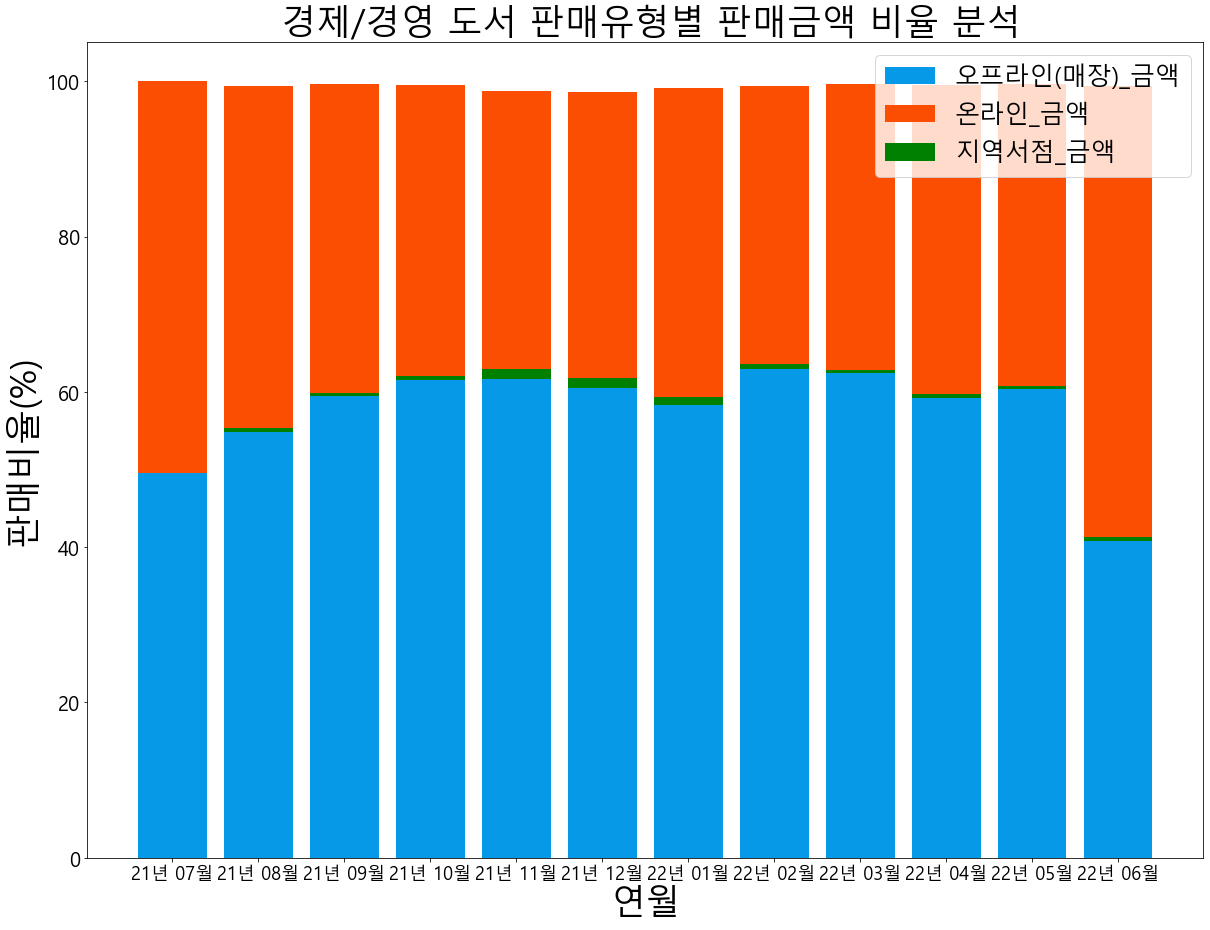

In [1210]:
# [경제/경영 도서 판매유형별 판매금액 비율 그래프 생성]


fig, ax = plt.subplots()

# 피규어 크기
fig.set_size_inches(20, 15)

# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)

# y 축만 그리드 그리기
#ax.grid(True, axis='y')

# bar 그리기
ax.bar(df_sell_money.index, df_sell_money['오프라인(매장)_금액_percent'], label = '오프라인(매장)_금액', color = '#0599e8')
ax.bar(df_sell_money.index, df_sell_money['온라인_금액_percent'], bottom = df_sell_money['오프라인(매장)_금액_percent'], label = '온라인_금액', color = '#fc4e03')
ax.bar(df_sell_money.index, df_sell_money['지역서점_금액_percent'], bottom = df_sell_money['오프라인(매장)_금액_percent'], label = '지역서점_금액', color = 'g')

# 라벨 설정
ax.set_title(" 경제/경영 도서 판매유형별 판매금액 비율 분석",fontsize=35)
ax.set_xlabel('연월', fontsize = 35)
ax.set_ylabel('판매비율(%)', fontsize = 35)

# tick 설정
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 20)

# 범례 표시
ax.legend(fontsize = 25)

# 판매유형별 판매금액 비율 분석 결과

- 11월,12월,1월(연말, 연초)에 지역서점에서 경제/경영 도서 판매 비율이 증가하는 것을 알 수 있습니다. 
- 6월에 오프라인 판매금액 비율이 급격히 떨어지는 것을 확인할 수 있습니다.

# 5. 월별 '경제/경영 도서 클릭량' 와 '경제/경영 월간 도서 판매량' 상관관계 분석

In [1211]:
df_sell_money

,오프라인(매장)_금액,온라인_금액,지역서점_금액,total_sell,오프라인(매장)_금액_percent,온라인_금액_percent,지역서점_금액_percent
연월,,,,,,,
21년 07월,5.359781e+08,5.454456e+08,17800.0,1.081441e+09,49.6,50.4,0.0
21년 08월,1.339064e+09,1.091323e+09,13927030.0,2.444314e+09,54.8,44.6,0.6
21년 09월,6.345917e+09,4.277040e+09,47774805.0,1.067073e+10,59.5,40.1,0.4
21년 10월,5.523614e+09,3.413293e+09,48666874.0,8.985574e+09,61.5,38.0,0.5
21년 11월,6.588030e+09,3.969022e+09,138635075.0,1.069569e+10,61.6,37.1,1.3
21년 12월,7.145388e+09,4.498438e+09,158293670.0,1.180212e+10,60.5,38.1,1.3
22년 01월,5.310929e+09,3.714721e+09,88453680.0,9.114104e+09,58.3,40.8,1.0
22년 02월,5.552705e+09,3.208205e+09,51290450.0,8.812200e+09,63.0,36.4,0.6
22년 03월,7.135674e+09,4.261272e+09,42066676.0,1.143901e+10,62.4,37.3,0.4


In [1212]:
# 오프라인(매장)_판매금액, 온라인_판매금액, 지역서점_판매금액, 총 판매 금액 불러오기 
df_sell_money = df_sell_money[df_sell_money.columns[:4]]

# 7월은 두 데이터간 날짜가 맞지 않아 데이터에서 제거
df_sell_money.drop("21년 07월",inplace=True)

df_sell_money

C:\Users\alstn\AppData\Local\Temp\ipykernel_16868\1072820340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell_money.drop("21년 07월",inplace=True)


,오프라인(매장)_금액,온라인_금액,지역서점_금액,total_sell
연월,,,,
21년 08월,1.339064e+09,1.091323e+09,13927030.0,2.444314e+09
21년 09월,6.345917e+09,4.277040e+09,47774805.0,1.067073e+10
21년 10월,5.523614e+09,3.413293e+09,48666874.0,8.985574e+09
21년 11월,6.588030e+09,3.969022e+09,138635075.0,1.069569e+10
21년 12월,7.145388e+09,4.498438e+09,158293670.0,1.180212e+10
22년 01월,5.310929e+09,3.714721e+09,88453680.0,9.114104e+09
22년 02월,5.552705e+09,3.208205e+09,51290450.0,8.812200e+09
22년 03월,7.135674e+09,4.261272e+09,42066676.0,1.143901e+10
22년 04월,4.798992e+09,3.271093e+09,37571715.0,8.107657e+09


In [1213]:
# 월별 클릭 데이터 가져오기
# 7월 데이터 제거
df3_month.drop(["2021-07","2022-07"],inplace=True)
df3_month

,male_click,female_click
날짜,,
2021-08,5000,3813
2021-09,6094,4336
2021-10,6186,4374
2021-11,7444,4872
2021-12,10666,6092
2022-01,8631,5532
2022-02,7662,5239
2022-03,8107,6168
2022-04,5794,3842


In [1214]:
# 인덱스 통합
df3_month.index= df_sell_money.index

In [1215]:
df_final=pd.concat([df9,df3_month],axis=1)
df_final

,오프라인(매장)_금액,온라인_금액,지역서점_금액,total_sell,male_click,female_click
연월,,,,,,
21년 08월,1.339064e+09,1.091323e+09,13927030.0,2.444314e+09,5000,3813
21년 09월,6.345917e+09,4.277040e+09,47774805.0,1.067073e+10,6094,4336
21년 10월,5.523614e+09,3.413293e+09,48666874.0,8.985574e+09,6186,4374
21년 11월,6.588030e+09,3.969022e+09,138635075.0,1.069569e+10,7444,4872
21년 12월,7.145388e+09,4.498438e+09,158293670.0,1.180212e+10,10666,6092
22년 01월,5.310929e+09,3.714721e+09,88453680.0,9.114104e+09,8631,5532
22년 02월,5.552705e+09,3.208205e+09,51290450.0,8.812200e+09,7662,5239
22년 03월,7.135674e+09,4.261272e+09,42066676.0,1.143901e+10,8107,6168
22년 04월,4.798992e+09,3.271093e+09,37571715.0,8.107657e+09,5794,3842


In [1216]:
df_final.corr()

,오프라인(매장)_금액,온라인_금액,지역서점_금액,total_sell,male_click,female_click
오프라인(매장)_금액,1.000000,0.650793,0.593349,0.948966,0.699300,0.693880
온라인_금액,0.650793,1.000000,0.457519,0.856781,0.282085,0.181597
지역서점_금액,0.593349,0.457519,1.000000,0.604258,0.761117,0.560509
total_sell,0.948966,0.856781,0.604258,1.000000,0.598479,0.549745
male_click,0.699300,0.282085,0.761117,0.598479,1.000000,0.936632
female_click,0.693880,0.181597,0.560509,0.549745,0.936632,1.000000


## [ 경제 / 경영 도서 월별 클릭량과 판매유형별 판매금액의 상관관계 분석 ]

- 오프라인 판매금액 ~ 전체 도서 판매금액 : 0.948966 
    --> 지난 1년간 경제/경영 도서의 전체 매출은 오프라인 매장 매출과 가장 관련이 높습니다.

- 오프라인 판매금액 ~ 클릭량 : 남 - 0.699300, 여 - 0.693880
    - 클릭량과 온라인 구매의 상관 관계가 높을 것이라 예상했으나, 오히려 클릭량과 오프라인 구매가 더 높은 상관 관계를 가집니다.
    - 경제/경영 도서는 온라인으로 검색 후 매장에 가서 구매할 확률이 높은 점을 이용하는 것을 추천할 수 있습니다.

- (추가) 경제/경영 도서 판매량 그래프를 코스피 지수와 비교해보았을 때, 판매금액이 유독 높은 9,12,3월은 코스피 지수가 급격히 폭락하는 모습을 확인할 수 있었습니다. 

# 3조 프로젝트 최종 결론

- 서점 등 관련 업계에서 이를 바탕으로 이벤트나 할인, 도서배치 활용 할 수 있을 것으로 예상

- 각 카테고리에서 성별간 관심도가 다르다. 관심도를 높이기 위해 주 이용 성별을 공략한 이벤트 사은품 등을 마련

- 전체적으로 관심도가 높았던 남자 20~50에게 도서별 검색량 높은 순 추천을 꾸준히 제공하여, 꾸준한 구매가 이어질 수 있도록 유도

- 도서 카테고리마다 관심도를 받는 시기가 다르므로 분기별 혹은 선택적기간에 인기가 많은 종류의 도서를 잘 보이도록 배치하고, 인기가 없는 도서는 할인 혜택 등 시기별 전력 수립 가능. 

- 60대를 온라인으로 끌어들이는 투자와 활동이 활발한 세대에 대한 투자 필요